## RNN 理論の話

普通、ニューラルネットを扱うとき、活性関数を $f$ 学習データを $X$ とし、重み $W$ バイアス $B$ とすると
ニューロンの作りは

$$
U = XW + B \\
Y = f(U)
$$

ということになる。  
ただしこれはその時点でのデータとしたときの問題で、前の状態が次の状態に影響するようなデータには正常に適用できない。

そこで、RNN ではデータ $X$ のある時点のデータを $X^{(t)}$ と仮定して

$$
U^{(t)} = X^{(t)}W + Y^{(t - 1)}V + B \\
Y^{(t)} = f(U^{(t)})
$$

こんな感じに前回のニューロン応答に追加の重み $V$ を加えて取り込む動作をする。

少し展開するとこんな感じ

$$
U^{(t)} = X^{(t)}W + Y^{(t - 1)}V + B \\
= \left(\begin{array}{xxxx}
    x^{(t)}_{11} & x^{(t)}_{12} & ... & x^{(t)}_{1m} \\
    x^{(t)}_{21} & x^{(t)}_{22} & ... & x^{(t)}_{2m} \\
    ...          & ...          & ... & ...          \\
    x^{(t)}_{h1} & x^{(t)}_{h2} & ... & x^{(t)}_{hm}
  \end{array}\right)
  \left(\begin{array}{xxxx}
    w_{11} & w_{12} & ... & w_{1m} \\
    w_{21} & w_{22} & ... & w_{2m} \\
    ...    & ...    & ... & ...    \\
    w_{n1} & w_{n2} & ... & w_{nm}
  \end{array}\right) + 
  \left(\begin{array}{xxxx}
    y^{(t-1)}_{11} & y^{(t-1)}_{12} & ... & y^{(t-1)}_{1n} \\
    y^{(t-1)}_{21} & y^{(t-1)}_{22} & ... & y^{(t-1)}_{2n} \\
    ...            & ...            & ... & ...            \\
    y^{(t-1)}_{h1} & y^{(t-1)}_{h2} & ... & y^{(t-1)}_{hn}
  \end{array}\right)
  \left(\begin{array}{xxxx}
    v_{11} & v_{12} & ... & v_{1n} \\
    v_{21} & v_{22} & ... & v_{2n} \\
    ...    & ...    & ... & ...    \\
    v_{n1} & v_{n2} & ... & v_{nn}
  \end{array}\right) +
  \left(\begin{array}{xxxx}
    b_1 & b_2 & ... & b_n \\
    b_1 & b_2 & ... & b_n \\
    ... & ... & ... & ... \\
    b_1 & b_2 & ... & b_n \\
  \end{array}\right) \\
= \left(\begin{array}{xxxx}
    \sum^m_{k=1} x^{(t)}_{1k} w_{k1} + \sum^m_{k=1} y^{(t-1)}_{1k} v_{k1} +b_1 & \sum^m_{k=1} x^{(t)}_{1k} w_{k2} + \sum^m_{k=1} y^{(t-1)}_{1k} v_{k2} +b_2 & ... & \sum^m_{k=1} x^{(t)}_{1k} w_{kn} + \sum^m_{k=1} y^{(t-1)}_{1k} v_{kn} + b_n \\
    \sum^m_{k=1} x^{(t)}_{2k} w_{k1} + \sum^m_{k=1} y^{(t-1)}_{2k} v_{k1} +b_1 & \sum^m_{k=1} x^{(t)}_{2k} w_{k2} + \sum^m_{k=1} y^{(t-1)}_{2k} v_{k2} +b_2 & ... & \sum^m_{k=1} x^{(t)}_{2k} w_{kn} + \sum^m_{k=1} y^{(t-1)}_{2k} v_{kn} + b_n \\
    ...          & ...          & ... & ...          \\
    \sum^m_{k=1} x^{(t)}_{hk} w_{k1} + \sum^m_{k=1} y^{(t-1)}_{hk} v_{k1} +b_1 & \sum^m_{k=1} x^{(t)}_{hk} w_{k2} + \sum^m_{k=1} y^{(t-1)}_{hk} v_{k2} +b_2 & ... & \sum^m_{k=1} x^{(t)}_{hk} w_{kn} + \sum^m_{k=1} y^{(t-1)}_{hk} v_{kn} + b_n \\
  \end{array}\right)
$$


RNN の活性関数には $tanh$ をよく使われてる。  
これはこんな関数らしい

$$
y = f(u) = \frac{ exp(u) - exp(-u) }{ exp(u) + exp(-u) }
$$

もう少しシンプルな書き方で一般化して

$$
u^{(t)} = \sum^m_{k=1} x^{(t)}_{k} w_{k} + \sum^m_{k=1} y^{(t-1)}_{k} v_{k} + b \\
y^{(t)} = f(u^{(t)})
$$

## 逆伝播

これを微分するのかー（汗  
連鎖律（下式）使って

$$
\frac{\partial E}{\partial w_i} = \sum^r_{t=1} \frac{\partial E}{\partial u^{(t)}} \frac{\partial u^{(t)}}{\partial w_i}
$$

で、次の様に定義して

$$
\delta^{(t)} = \frac{\partial E}{\partial u^{(t)}} \\
= \frac{\partial E}{\partial y^{(t)}} \frac{\partial y^{(t)}}{\partial u^{(t)}}
$$

$ \frac{\partial E}{\partial y^{(t)}} $
は一つ前の出力層から拾ってこれて、
$ \frac{\partial y^{(t)} }{\partial u^{(t)} } $
は活性関数の偏微分。

$w$
から偏微分するとした場合

$$
u^{(t)} = \sum^m_{k=1} x^{(t)}_{k} w_{k} + \sum^m_{k=1} y^{(t-1)}_{k} v_{k} + b
$$

これを偏微分すれば $w$
の無い項は消失するので

$$
\frac{\partial u^{(t)}}{\partial w_i} = \frac{\partial (\sum^m_{k=1} x^{(t)}_k w_k) }{\partial w_i} \\
= \frac{\partial}{\partial w_i} (x^{(t)}_1 w_1 + x^{(t)}_2 w_2 + ... x^{(t)}_m w_m)  \\
= x^{(t)}_i
$$


置き換えすると

$$
\frac{\partial E}{\partial w_i} = \sum^r_{t=1} \frac{\partial E}{\partial u^{(t)}} \frac{\partial u^{(t)}}{\partial w_i}
= \sum^r_{t=1} x^{(t)}_i \delta^{(t)}
$$

$v$ の偏微分も考えると同様な展開して

$$
\frac{\partial E}{\partial v_i} = \sum^r_{t=1} \frac{\partial E}{\partial u^{(t)}} \frac{\partial u^{(t)}}{\partial v_i} \\
= \sum^r_{t=1} y^{(t-1)}_i \delta^{(t)}
$$

バイアスなんかはもっと単純に

$$
\frac{\partial E}{\partial b} = \sum^r_{t=1} \delta^{(t)}
$$

特定時刻の入力 $x^{(t)}_i$
の勾配を考えると、ニューロン毎の $u^{(t)}_k$
を挟んだ連鎖律を使って求める。

$$
\frac{\partial E}{\partial x^{(t)}_i} = \sum^n_{k=1} \frac{\partial E}{\partial u^{(t)}_k} \frac{\partial u^{(t)}_k}{\partial x^{(t)}_i}
$$

ここで $ \delta^{(t)} = \frac{\partial E}{\partial u^{(t)}} $
なので

$$
= \sum^n_{k=1} \frac{\partial u^{(t)}_k}{\partial x^{(t)}_i} \delta^{(t)}_k
$$

$u$
は

$$
u^{(t)} = \sum^m_{k=1} x^{(t)}_{k} w_{k} + \sum^m_{k=1} y^{(t-1)}_{k} v_{k} + b
$$

なので、$\partial x$
の偏微分なら $x$
を含まない項は消えるので、

$$
\frac{\partial u^{(t)}_k}{\partial x^{(t)}_i} = \sum^m_{k=1} w_{ik}
$$

通して

$$
\frac{\partial E}{\partial x^{(t)}_i} = \sum^n_{k=1} \frac{\partial E}{\partial u^{(t)}_k} \frac{\partial u^{(t)}_k}{\partial x^{(t)}_i} \\
= \sum^m_{k=1} w_{ik} \delta^{(t)}_k
$$

RNN層の上に別の層がある場合にその層の勾配を求めるのに利用。  
前の時刻の出力の勾配を考えると

$$
\frac{\partial E}{\partial y^{(t-1)}_i} = \sum^n_{k-1} \frac{\partial E}{\partial u^{(t)}_k} \frac{\partial u^{(t)}_k}{\partial y^{(t-1)}} = \sum^n_{k=1} v_{ik} \delta^{(t)}_k
$$

ここで、$\delta$
を考えると

$$
\delta^{(t)} = \frac{\partial E}{\partial u^{(t)}} \\
= \frac{\partial E}{\partial y^{(t)}} \frac{\partial y^{(t)}}{\partial u^{(t)}}
$$

このうち $\frac{\partial E}{\partial y^{(t)}}$
はさっき書いた様に、一つ前の層の勾配で、$\frac{\partial y^{(t)}}{\partial u^{(t)}}$
は活性関数の偏微分。

RNN の活性関数は $tanh$ で、その微分は
$\frac{dy}{du} = (1 - y^2)$

## 逆伝播を行列で考えると

$$
\frac{\partial E}{\partial W} = \sum^r_{t=1} X^{(t)T} \Delta^{(t)} 
$$

In [1]:
import numpy as np
#import cupy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
class RnnBaseLayer:
    def __init__(self, n_upper, n):
        self.w = np.random.randn(n_upper, n) / np.sqrt(n_upper)
        self.v = np.random.randn(n, n) / np.sqrt(n)
        self.b = np.zeros(n)
    
    def forward(self, x, prev_y):
        u = np.dot(x, self.w) + np.dot(prev_y, self.v) + self.b
        self.y = np.tanh(u)
    
    def backword(self, x, y, prev_y, grad_y):
        delta = grad_y * (1 - y**2)

        self.grad_w += np.dot(x.T, delta)
        self.grad_v += np.dot(prev_y.T, delta)
        self.grad_b += np.sum(delta, axis=0)

        self.grad_x = np.dot(delta, self.w.T)
        self.grad_prev_y = np.dot(delta, self.v.T)

    def reset_sum_grad(self):
        self.grad_w = np.zeros_like(self.w)
        self.grad_v = np.zeros_like(self.v)
        self.grad_b = np.zeros_like(self.b)

    def update(self, eta):
        self.w -= eta * self.grad_w
        self.v -= eta * self.grad_v
        self.b -= eta * self.grad_b

class OutputLayer:
    def __init__(self, n_upper, n):
        self.w = np.random.randn(n_upper, n) / np.sqrt(n_upper)
        self.b = np.zeros(n)
    
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = u
    
    def backword(self, t):
        delta = self.y - t
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        self.grad_x = np.dot(delta, self.w.T)
    
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

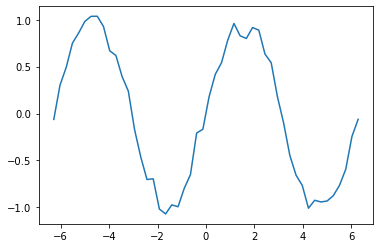

In [16]:
# ダミー学習データ(X軸範囲)
sin_x = np.linspace(-2 * np.pi, 2 * np.pi)
# ノイズを載せる
sin_y = np.sin(sin_x) + 0.1 * np.random.randn(len(sin_x))

plt.plot(sin_x, sin_y)
plt.show()

In [17]:
n_time = 10  # 時系列の数
n_in   = 1   # 入力層ニューロン数
n_mid  = 20  # 中間層ニューロン数
n_out  = 1   # 出力層ニューロン数

# 学習データ
n_sample     = len(sin_x) - n_time
input_data   = np.zeros((n_sample, n_time, n_in))
correct_data = np.zeros((n_sample, n_out))
for i in range(0, n_sample):
    input_data[i]   = sin_y[i:i+n_time].reshape(-1, 1)
    correct_data[i] = sin_y[i+n_time : i+n_time+1]

# 一度に食わせるデータは n_time 個数分
# データ形式的には
# input_data[元データ件数 - 学習する時間][1単位時間進んだデータ][時間単位データ]
# input_data[0] = 学習データの先頭～n_time 分のデータ
# input_data[0][0] = [先頭データ]
# input_data[0][1] = [先頭+1 のデータ]
# correct_data は 1 データだけずらした値

Epoch: 1 / 51 , Error: 3.0981672136553926
Epoch: 6 / 51 , Error: 0.9783403432894484
Epoch: 11 / 51 , Error: 0.59502170863948
Epoch: 16 / 51 , Error: 0.5353376525112197
Epoch: 21 / 51 , Error: 0.5235613113363669
Epoch: 26 / 51 , Error: 0.5309580217817462
Epoch: 31 / 51 , Error: 0.5345140572278949
Epoch: 36 / 51 , Error: 0.5417341714590481
Epoch: 41 / 51 , Error: 0.5502313196446889
Epoch: 46 / 51 , Error: 0.5545772013367675
Epoch: 51 / 51 , Error: 0.5676063703773124


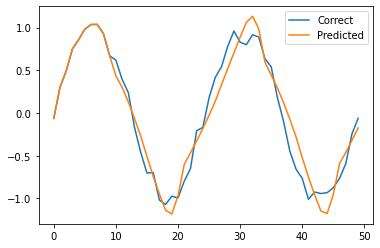

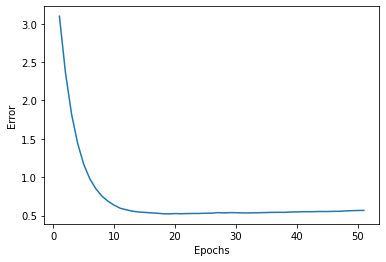

In [18]:
epochs     = 51
batch_size = 8
interval   = 5
eta        = 0.001

# 学習
rnn_layer = RnnBaseLayer(n_in, n_mid)
out_layer = OutputLayer(n_mid, n_out)

def train(x_mb, t_mb):
    y_rnn  = np.zeros((len(x_mb), n_time + 1, n_mid))
    prev_y = y_rnn[:, 0, :]
    for i in range(n_time):
        x = x_mb[:, i, :]
        rnn_layer.forward(x, prev_y)
        y = rnn_layer.y
        y_rnn[:, i + 1, :] = y
        prev_y = y
    
    out_layer.forward(y)

    # 逆伝播
    out_layer.backword(t_mb)
    grad_y = out_layer.grad_x

    rnn_layer.reset_sum_grad()
    for i in reversed(range(n_time)):
        x = x_mb[:, 1, :]
        y = y_rnn[:, 1+1, :]
        prev_y = y_rnn[:, i, :]
        rnn_layer.backword(x, y, prev_y, grad_y)
        grad_y = rnn_layer.grad_prev_y
    
    # パラメータ更新
    rnn_layer.update(eta)
    out_layer.update(eta)


# 予測
def predict(x_mb):
    prev_y = np.zeros((len(x_mb), n_mid))
    for i in range(n_time):
        x = x_mb[:, i, :]
        rnn_layer.forward(x, prev_y)
        y = rnn_layer.y
        prev_y = y
    
    out_layer.forward(y)
    return out_layer.y


# エラー計測
def get_error(x, t):
    y = predict(x)
    return 1.0 / 2.0*np.sum(np.square(y - t))

error_record = []
n_batch = len(input_data)

for i in range(epochs):
    # create rand indexes
    index_rand = np.arange(len(input_data))
    np.random.shuffle(index_rand)

    for j in range(n_batch):
        # get learn data and corrects
        mb_index = index_rand[j*batch_size : (j+1)*batch_size]
        x_mb = input_data[mb_index, :]
        t_mb = correct_data[mb_index, :]
        train(x_mb, t_mb)

    # calc err
    error = get_error(input_data, correct_data)
    error_record.append(error)

    # show state
    if i % interval == 0:
        print(f'Epoch: {i + 1} / {epochs} , Error: {error}')

predicted = input_data[0].reshape(-1).tolist()
for i in range(n_sample):
    x = np.array(predicted[-n_time:]).reshape(1, n_time, 1)
    y = predict(x)
    predicted.append(float(y[0, 0]))

plt.plot(range(len(sin_x)), sin_y.tolist(), label='Correct')
plt.plot(range(len(predicted)), predicted, label='Predicted')
plt.legend()
plt.show()

plt.plot(range(1, len(error_record) + 1), error_record)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()